In [1]:
import pandas as pd
import numpy as np
import logging
import scipy.signal as scs
import src
import smile_extract
from sklearn.decomposition import PCA
logging.basicConfig(level=logging.INFO)

monkey = 'Dwight'
date = '2025-01-07'
path = f'../data/trialframe/{monkey}/{date}/{monkey}_{date}_tf.parquet'
tf = pd.read_parquet(path)
tf

channel                          monkey session date  \
signal                                                 
trial_id time                                          
153      0 days 00:00:00         Dwight   2025-01-07   
         0 days 00:00:00.010000  Dwight   2025-01-07   
         0 days 00:00:00.020000  Dwight   2025-01-07   
         0 days 00:00:00.030000  Dwight   2025-01-07   
         0 days 00:00:00.040000  Dwight   2025-01-07   
...                                 ...          ...   
152      0 days 00:00:04.340000  Dwight   2025-01-07   
         0 days 00:00:04.350000  Dwight   2025-01-07   
         0 days 00:00:04.360000  Dwight   2025-01-07   
         0 days 00:00:04.370000  Dwight   2025-01-07   
         0 days 00:00:04.380000  Dwight   2025-01-07   

channel                                                         block  \
signal                                                                  
trial_id time                                                           
153      0 days 00:00:00         reward-type-medium-large-cst-rtt-dco   
         0 days 00:00:00.010000  reward-type-medium-large-cst-rtt-dco   
         0 days 00:00:00.020000  reward-type-medium-large-cst-rtt-dco   
         0 days 00:00:00.030000  reward-type-medium-large-cst-rtt-dco   
         0 days 00:00:00.040000  reward-type-medium-large-cst-rtt-dco   
...                                                               ...   
152      0 days 00:00:04.340000        reward-type-medium-cst-rtt-dco   
         0 days 00:00:04.350000        reward-type-medium-cst-rtt-dco   
         0 days 00:00:04.360000        reward-type-medium-cst-rtt-dco   
         0 days 00:00:04.370000        reward-type-medium-cst-rtt-dco   
         0 days 00:00:04.380000        reward-type-medium-cst-rtt-dco   

channel                              trial datetime task   result  \
signal                                                              
trial_id time                                                       
153      0 days 00:00:00        2025-01-07 13:21:17  CST  success   
         0 days 00:00:00.010000 2025-01-07 13:21:17  CST  success   
         0 days 00:00:00.020000 2025-01-07 13:21:17  CST  success   
         0 days 00:00:00.030000 2025-01-07 13:21:17  CST  success   
         0 days 00:00:00.040000 2025-01-07 13:21:17  CST  success   
...                                             ...  ...      ...   
152      0 days 00:00:04.340000 2025-01-07 13:20:42  CST  success   
         0 days 00:00:04.350000 2025-01-07 13:20:42  CST  success   
         0 days 00:00:04.360000 2025-01-07 13:20:42  CST  success   
         0 days 00:00:04.370000 2025-01-07 13:20:42  CST  success   
         0 days 00:00:04.380000 2025-01-07 13:20:42  CST  success   

channel                                    state hand position              \
signal                                                       x           y   
trial_id time                                                                
153      0 days 00:00:00         Reach to Center    122.566097  831.244227   
         0 days 00:00:00.010000  Reach to Center    122.554410  831.228788   
         0 days 00:00:00.020000  Reach to Center    122.555826  831.221718   
         0 days 00:00:00.030000  Reach to Center    122.561832  831.242384   
         0 days 00:00:00.040000  Reach to Center    122.560529  831.237312   
...                                          ...           ...         ...   
152      0 days 00:00:04.340000          Success    131.019076  899.375467   
         0 days 00:00:04.350000          Success    130.678476  899.449719   
         0 days 00:00:04.360000          Success    130.328765  899.540967   
         0 days 00:00:04.370000          Success    129.983302  899.620873   
         0 days 00:00:04.380000          Success    129.675428  899.682388   

channel                                     ... motor cortex                  \
signal                                   z  ...     

In [ ]:
from scripts.cross_task_decoding import precondition_data

neural_data,hand_data = precondition_data(tf)


<Axes: xlabel='model', ylabel='test data'>

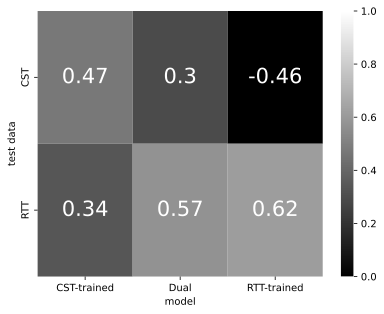

In [ ]:
from scripts.cross_task_decoding import cross_validate_task_trained_decoders
import seaborn as sns

scores = cross_validate_task_trained_decoders(
    neural_data,
    hand_data['x'],
)

sns.heatmap(
    data=(
        scores
        .groupby(['model','test data'])
        .mean()
        .unstack(level='model')
    ),
    vmin=0,
    vmax=1,
    annot=True,
    annot_kws={'fontsize': 21},
    cmap='gray',
)

In [ ]:
from scripts.cross_task_decoding import decode_single_trials

single_trial_predictions = decode_single_trials(
    neural_data,
    hand_data['x'],
)
single_trial_predictions

model                                                         CST-trained  \
trial_id time                     task state                                
1        -1 days +23:59:59.500000 RTT  Hold Center (RTT Cue)   -43.570839   
         -1 days +23:59:59.510000 RTT  Hold Center (RTT Cue)   -42.052261   
         -1 days +23:59:59.520000 RTT  Hold Center (RTT Cue)   -40.595090   
         -1 days +23:59:59.530000 RTT  Hold Center (RTT Cue)   -39.189568   
         -1 days +23:59:59.540000 RTT  Hold Center (RTT Cue)   -37.823388   
...                                                                   ...   
574      0 days 00:00:02.960000   CST  Go Cue                    4.838136   
         0 days 00:00:02.970000   CST  Go Cue                    4.256473   
         0 days 00:00:02.980000   CST  Go Cue                    3.685191   
         0 days 00:00:02.990000   CST  Go Cue                    3.102828   
         0 days 00:00:03          CST  Success                   2.487197   

model                                                         RTT-trained  \
trial_id time                     task state                                
1        -1 days +23:59:59.500000 RTT  Hold Center (RTT Cue)   -41.293348   
         -1 days +23:59:59.510000 RTT  Hold Center (RTT Cue)   -41.845240   
         -1 days +23:59:59.520000 RTT  Hold Center (RTT Cue)   -42.625158   
         -1 days +23:59:59.530000 RTT  Hold Center (RTT Cue)   -43.556271   
         -1 days +23:59:59.540000 RTT  Hold Center (RTT Cue)   -44.553341   
...                                                                   ...   
574      0 days 00:00:02.960000   CST  Go Cue                  -59.802319   
         0 days 00:00:02.970000   CST  Go Cue                  -67.838840   
         0 days 00:00:02.980000   CST  Go Cue                  -75.544918   
         0 days 00:00:02.990000   CST  Go Cue                  -82.876515   
         0 days 00:00:03          CST  Success                 -89.791480   

model                                                              Dual  
trial_id time                     task state                             
1        -1 days +23:59:59.500000 RTT  Hold Center (RTT Cue) -46.530619  
         -1 days +23:59:59.510000 RTT  Hold Center (RTT Cue) -46.291708  
         -1 days +23:59:59.520000 RTT  Hold Center (RTT Cue) -46.132351  
         -1 days +23:59:59.530000 RTT  Hold Center (RTT Cue) -46.015750  
         -1 days +23:59:59.540000 RTT  Hold Center (RTT Cue) -45.900240  
...                                                                 ...  
574      0 days 00:00:02.960000   CST  Go Cue                 -2.559041  
         0 days 00:00:02.970000   CST  Go Cue                 -3.748126  
         0 days 00:00:02.980000   CST  Go Cue                 -4.847538  
         0 days 00:00:02.990000   CST  Go Cue                 -5.867821  
         0 days 00:00:03          CST  Success                -6.818551  

[102950 rows x 3 columns]

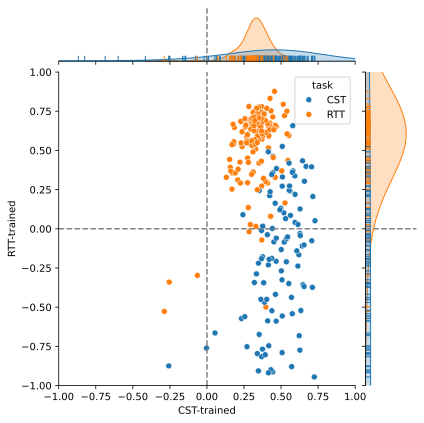

In [ ]:
from scripts.cross_task_decoding import score_single_trials
single_trial_scores = score_single_trials(hand_data['x'],single_trial_predictions)
scores_plot = sns.jointplot(
    data=(
        single_trial_scores
        .unstack(level='model')
    ),
    x='CST-trained',
    y='RTT-trained',
    hue='task',
    hue_order=['CST','RTT'],
    palette=['C0','C1'],
    xlim=(-1,1),
    ylim=(-1,1),
    marginal_ticks=False
)
scores_plot.plot_marginals(sns.rugplot,height=0.1,palette=['C0','C1'])
scores_plot.refline(x=0,y=0)

<Axes: xlabel='model', ylabel='task'>

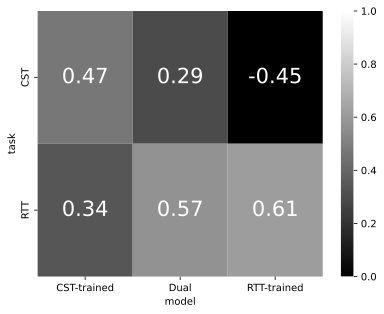

In [20]:
from sklearn.metrics import r2_score
sns.heatmap(
    data = (
        single_trial_predictions
        .stack(level='model')
        .to_frame('predicted')
        .assign(true=hand_data['x'])
        .groupby(['task','model'])
        .apply(lambda set: r2_score(set['true'],set['predicted']))
        .unstack(level='model')
    ),
    vmin=0,
    vmax=1,
    annot=True,
    annot_kws={'fontsize': 21},
    cmap='gray',
)

In [ ]:
pd.testing.assert_series_equal(
    single_trial_predictions['true'].rename('x'),
    hand_data['x'],
    check_exact=True,
)